In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt

In [4]:
# Load the dataset from the given file path
file_path = r'C:\Users\DELL\OneDrive\Documents\GitHub\HEM-Housing-ML-Model\clean-datasets\mel-housing-data-cleaned.csv'
data = pd.read_csv(file_path)


In [5]:
# Create new features based on interactions between existing features
# These are custom features derived from distance, rooms, bathrooms, and school facilities
data['Schools_Distance_Ratio'] = data['Schooling_Facilities'] / (data['Distance_from_CBD'] + 1)
data['Rooms_Bathroom_Interaction'] = data['Rooms'] * data['Bathroom']
data['Distance_Schools_Interaction'] = data['Distance_from_CBD'] * data['Schooling_Facilities']

In [6]:
# Drop any remaining rows that contain NaN values to ensure data consistency
data.dropna(inplace=True)

## Split the dataset into training and testing sets ##

In [7]:
# Select features (X) and target variable (Price, y) from the dataset
X = data[['Rooms', 'Bathroom', 'Distance_from_CBD', 'Schooling_Facilities', 
          'Rooms_Bathroom_Interaction', 'Distance_Schools_Interaction', 'Schools_Distance_Ratio']]
y = data['Price']

# Split the dataset into training (80%) and testing (20%) sets to evaluate model performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training: Random Forest with Hyperparameter Tuning ##

In [8]:
# Define a parameter grid for Random Forest hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [10, 20, None],     # Maximum depth of the trees
    'min_samples_split': [2, 5, 10], # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],   # Minimum samples required to be a leaf node
    'bootstrap': [True, False]       # Whether to use bootstrapped samples or not
}

In [9]:
# Initialize the Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)

# Use GridSearchCV to find the best hyperparameters using cross-validation
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Fit the GridSearch to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearch
print("\nBest Hyperparameters for Random Forest:", grid_search.best_params_)

# Use the best model from GridSearch for predictions
best_rf = grid_search.best_estimator_

Fitting 3 folds for each of 162 candidates, totalling 486 fits


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Best Hyperparameters for Random Forest: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [10]:
# Make predictions on the training and testing sets using the best Random Forest model
y_rf_pred_train = best_rf.predict(X_train)
y_rf_pred_test = best_rf.predict(X_test)


In [11]:

# Evaluate the performance of the tuned Random Forest model using R² and MSE
print("\nTuned Random Forest Performance:")
print(f"Train R²: {r2_score(y_train, y_rf_pred_train):.2f}")
print(f"Test R²: {r2_score(y_test, y_rf_pred_test):.2f}")
print(f"Test MSE: {mean_squared_error(y_test, y_rf_pred_test):.2f}")



Tuned Random Forest Performance:
Train R²: 0.72
Test R²: 0.69
Test MSE: 77874173145.72


## Model Training: Polynomial Regression ##

In [12]:
# Apply polynomial transformation to create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train a Linear Regression model on the polynomial features
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)



LinearRegression()

In [13]:
# Make predictions on the training and testing sets
y_poly_pred_train = poly_reg.predict(X_poly_train)
y_poly_pred_test = poly_reg.predict(X_poly_test)



In [14]:
# Evaluate the performance of the Polynomial Regression model
print("\nPolynomial Regression (Degree 2) Performance:")
print(f"Train R²: {r2_score(y_train, y_poly_pred_train):.2f}")
print(f"Test R²: {r2_score(y_test, y_poly_pred_test):.2f}")
print(f"Test MSE: {mean_squared_error(y_test, y_poly_pred_test):.2f}")


Polynomial Regression (Degree 2) Performance:
Train R²: 0.62
Test R²: 0.62
Test MSE: 94830533237.99


## Model Training: Gradient Boosting Regressor ##

In [15]:
# Initialize the Gradient Boosting Regressor and train it on the training data
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_gbr_pred_train = gbr.predict(X_train)
y_gbr_pred_test = gbr.predict(X_test)

In [16]:
# Evaluate the performance of the Gradient Boosting Regressor
print("\nGradient Boosting Regressor Performance:")
print(f"Train R²: {r2_score(y_train, y_gbr_pred_train):.2f}")
print(f"Test R²: {r2_score(y_test, y_gbr_pred_test):.2f}")
print(f"Test MSE: {mean_squared_error(y_test, y_gbr_pred_test):.2f}")


Gradient Boosting Regressor Performance:
Train R²: 0.67
Test R²: 0.67
Test MSE: 84190190723.10


### Visualizations: Reduced Scatter Points ###

In [17]:
# Visualize predictions vs actual prices for each model with a reduced number of scatter points
sample_size = 100  # Limit the number of points plotted for better visualization

### Visualizationg for Random Forest

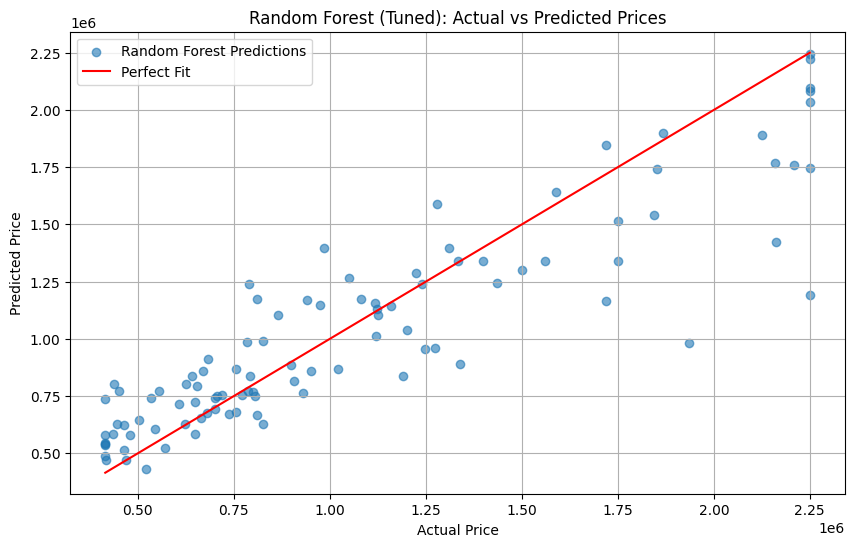

In [18]:
# Random Forest Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test[:sample_size], y_rf_pred_test[:sample_size], alpha=0.6, label="Random Forest Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", label="Perfect Fit")
plt.title("Random Forest (Tuned): Actual vs Predicted Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.grid(True)
plt.savefig(r'C:\Users\DELL\OneDrive\Documents\GitHub\HEM-Housing-ML-Model\images\random-forest.jpg')
plt.show()


### Visualization for Polynomial Regression ###

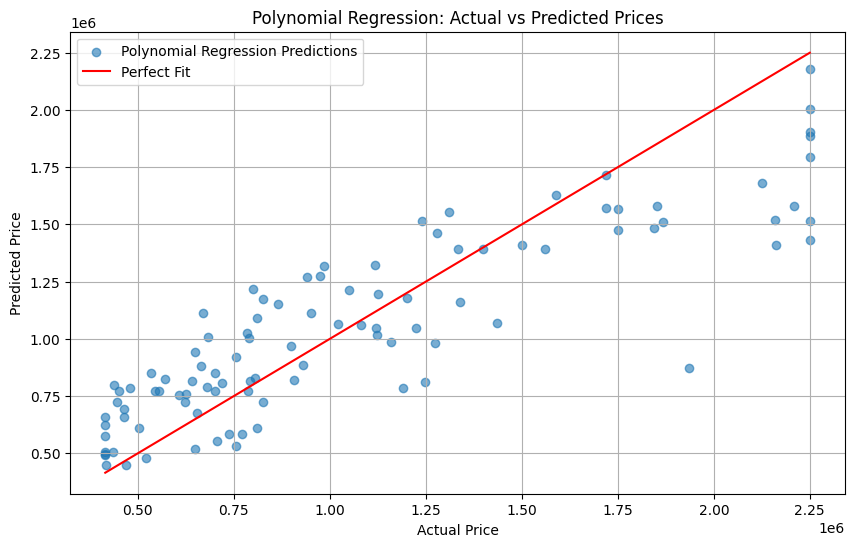

In [19]:
# Polynomial Regression Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test[:sample_size], y_poly_pred_test[:sample_size], alpha=0.6, label="Polynomial Regression Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", label="Perfect Fit")
plt.title("Polynomial Regression: Actual vs Predicted Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.grid(True)
plt.savefig(r'C:\Users\DELL\OneDrive\Documents\GitHub\HEM-Housing-ML-Model\images\polynomial-regression.jpg')
plt.show()

### Visualization for Gradient Boosting Regressor ###

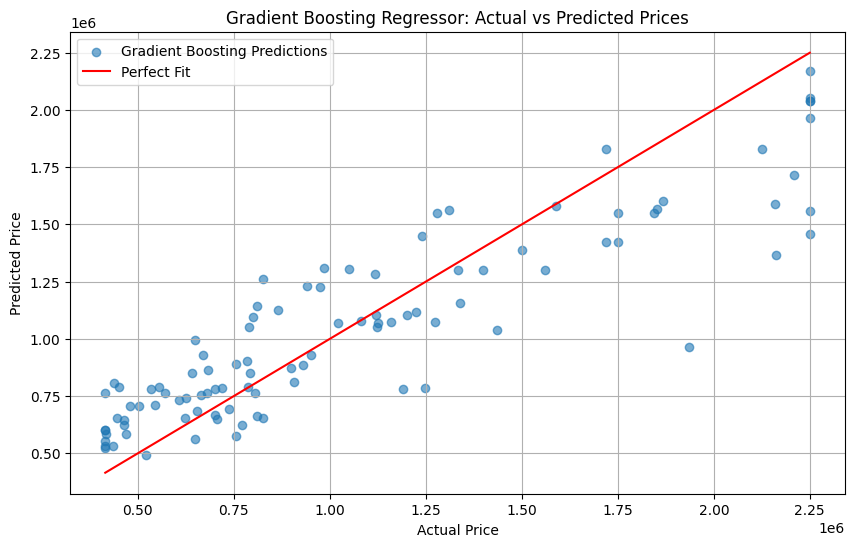

In [20]:
# Gradient Boosting Regressor Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test[:sample_size], y_gbr_pred_test[:sample_size], alpha=0.6, label="Gradient Boosting Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", label="Perfect Fit")
plt.title("Gradient Boosting Regressor: Actual vs Predicted Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.grid(True)
plt.savefig(r'C:\Users\DELL\OneDrive\Documents\GitHub\HEM-Housing-ML-Model\images\gradient-boostong-regressor.jpg')
plt.show()

### Displaying Actual vs Predicted Price Table ###

In [21]:
# Convert all predicted arrays and actual prices into a DataFrame with consistent index
comparison_df = pd.DataFrame({
    'Actual Price': y_test.reset_index(drop=True),  # Reset index for consistency
    'Gradient Boosting Predicted': pd.Series(y_gbr_pred_test).reset_index(drop=True)
})

# Ensure the predicted values are not displayed in scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

# Display the first 10 rows of the table
print("\nComparison of Actual vs Predicted Prices (First 10 rows):")
print(comparison_df.head(10))


Comparison of Actual vs Predicted Prices (First 10 rows):
   Actual Price  Gradient Boosting Predicted
0     556000.00                    787826.68
1     680000.00                    764608.38
2    1275000.00                   1075602.13
3     545000.00                    710195.29
4     655000.00                    683615.12
5    2250000.00                   2054204.17
6    1720000.00                   1831101.48
7    2250000.00                   2170880.13
8     415000.00                    602984.41
9    2250000.00                   1457014.32
